<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging <br/> Présentation des résultats algorithmique</h1>

In [1]:
#chargement des corpus en mémoire

import dataAnalysis as da
import matplotlib.pyplot as plt
import numpy as np
da.init()

Initialization...
	Preparing corpus fr.foot.test.json...
	Done
	Preparing corpus fr.gsd.test.json...
	Done
	Preparing corpus fr.sequoia.train.json...
	Done
	Preparing corpus fr.ftb.test.json...
	Done
	Preparing corpus fr.ftb.dev.json...
	Done
	Preparing corpus fr.spoken.test.json...
	Done
	Preparing corpus fr.pud.train.json...
	Done
	Preparing corpus fr.spoken.train.json...
	Done
	Preparing corpus fr.natdis.test.json...
	Done
	Preparing corpus fr.partut.dev.json...
	Done
	Preparing corpus fr.sequoia.test.json...
	Done
	Preparing corpus fr.gsd.dev.json...
	Done
	Preparing corpus fr.sequoia.dev.json...
	Done
	Preparing corpus fr.gsd.train.json...
	Done
	Preparing corpus fr.pud.test.json...
	Done
	Preparing corpus fr.ftb.train.json...
	Done
	Preparing corpus fr.partut.test.json...
	Done
	Preparing corpus fr.partut.train.json...
	Done
	Preparing corpus fr.spoken.dev.json...
	Done
Done!


# Statistique des corpus

In [ ]:
#itère sur chacun des corpus
def iterateCorpus(f, printing = True):
    for nameCorpus, corpus in da.listeCorpus.items():
        if printing:
            print("corpus : ", nameCorpus)
        for typeDS, dataset in corpus.getDataset().items():
            if printing:
                print("ensemble ", typeDS)
            f(dataset, nameCorpus, typeDS)

# met à jour les données statistiques
def updateStat(dataset, nm, tds):
    dataset.updateStat()

# affiche les statistiques basique


def printBasicStat(dataset, nm, tds):
    #baseStat.append((nm + " " + tds, len(dataset.data), dataset.nbWord, dataset.nbUniqueWords))
    print("   nombre de phrase : ", len(dataset.data))
    print("   nombre de mot : ", dataset.nbWord)
    print("   nombre de mot unique : ", dataset.nbUniqueWords)


    

# affiche les 10 mots / labels les plus fréquents de chaque corpus
def printMostFrequent(dataset, nm, tds):
    print()
    print("10 mots les plus fréquents : ")
    print(dataset.mostFrequentWord)
    print()
    print()
    print("labels les plus fréquents : ")
    print(dataset.mostFrequentLabel)
    print()
    
# affiche les 10 mots les plus ambigu de chaque corpus
def printMostAmbiguousWord(dataset, nm, tds):
    ambiguousDict, ambiguousWord = dataset.ambiguousWord()
    
    def sortSecond(val):
        return len(val[1])
    
    ambiguousWord.sort(key = sortSecond, reverse = True)
    
    print()
    print("5 mots les plus ambigu : ", ambiguousWord[:5])
    print()
    
iterateCorpus(updateStat, False)

In [ ]:
#baseStat = []

iterateCorpus(printBasicStat)

from tabulate import tabulate

#print(tabulate(baseStat, tablefmt="latex", floatfmt=".2f"))

In [ ]:
iterateCorpus(printMostFrequent)

In [ ]:
#mot les plus ambigu de chaque corpus

iterateCorpus(printMostAmbiguousWord)

## Out Of Vocabulary Word

In [ ]:
# Calcul des Out of Vocabulary Words
oovLatex = []


footTest = da.listeCorpus['foot'].testDataSet
natdisTest = da.listeCorpus['natdis'].testDataSet


for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        oovResult = corpus.computeCorpusOOV()
        oovResultFoot = corpus.computeOOV(footTest)
        oovResultnatdis = corpus.computeOOV(natdisTest)
        print(nameCorpus, " : ")
        print("     Pourcentage de l'oov entre train et test : ", oovResult[0])
        print("     Pourcentage de l'oov entre train et dev : ", oovResult[1])
        print("     Pourcentage de l'oov entre train et footTest : ", oovResultFoot)
        print("     Pourcentage de l'oov entre train et natdisTest : ", oovResultnatdis)
        latexRows = (nameCorpus, oovResult[0], oovResult[1], oovResultFoot, oovResultnatdis)
        oovLatex.append(latexRows)

print(tabulate(oovLatex, tablefmt="latex"))

## Divergence de Kullback-Leibler

In [ ]:
# Calcul des divergence de KullBack-Leibler

latexDKL = []

for nameCorpus, corpus in da.listeCorpus.items():
    if corpus.trainExist:
        print(nameCorpus + " : ")
        DKLResult = corpus.computeCorpusKLDivergence()
        DKLFootresult = corpus.computeKLDivergence(footTest)
        DKLnatdisResult = corpus.computeKLDivergence(natdisTest)
        print("     Dkl(test||train) = ", DKLResult)
        print("     Dkl(footTest||train) = ", DKLFootresult)
        print("     Dkl(natdisTest||train) = ", DKLnatdisResult)
        latexDKL.append( (nameCorpus, DKLResult, DKLFootresult, DKLnatdisResult) )
        
        
print(tabulate(latexDKL, tablefmt="latex"))

# Perplexity

In [ ]:
latexPerplexity = []

print("                         train,                   test,              dev")
for nameCorpus, corpus in da.listeCorpus.items():
    print(nameCorpus, " : ")
    pp_res = corpus.computePerplexityCorpus()
    print("     perplexity : ", pp_res)
    latexRow = []
    latexRow.append(nameCorpus)
    if type(pp_res) == tuple:
        for i in pp_res:
            latexRow.append(i)
    else:
        latexRow.append(pp_res)
    latexPerplexity.append( latexRow )
    
print(tabulate(latexPerplexity, tablefmt="latex"))

# Training Model
## Decision Tree Classifier

### Validation croisée detection des meilleurs hyper-paramètre

In [6]:
import modelAnalysis as ma
import DecisionTreeClassifier as dtree
import features as ft

In [ ]:
# temps de calcul de cette cellule très long
for namedataset, _ in da.listeCorpus.items():
    if namedataset not in ["gsd", "ftb"]:
        ma.analyzeDecisionTree(namedataset, verbose=True)

### Analyse du changement de contexte avec les meilleurs hyper-paramètres

In [7]:
footTest = da.listeCorpus["foot"].testDataSet
natdisTest = da.listeCorpus["natdis"].testDataSet

Xfoot, Yfoot = ft.buildFeature(footTest)
Xnatdis, Ynatdis = ft.buildFeature(natdisTest)

/home/fusroman/Documents/Informatique_et_Programmation/Intelligence Artificielle/M1_Intro_machine_learning/Projet/src/modelAnalysis.py:238: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


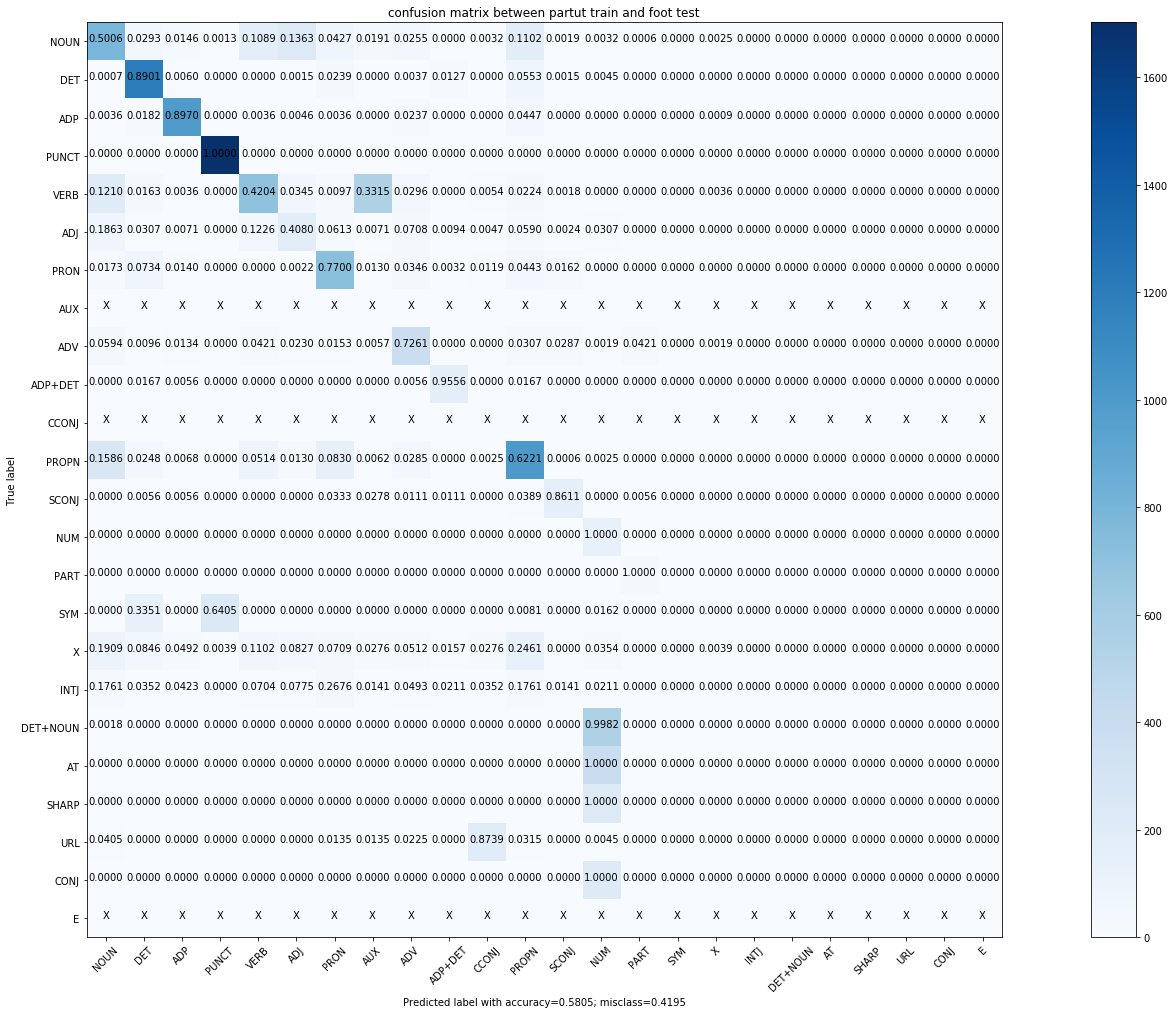

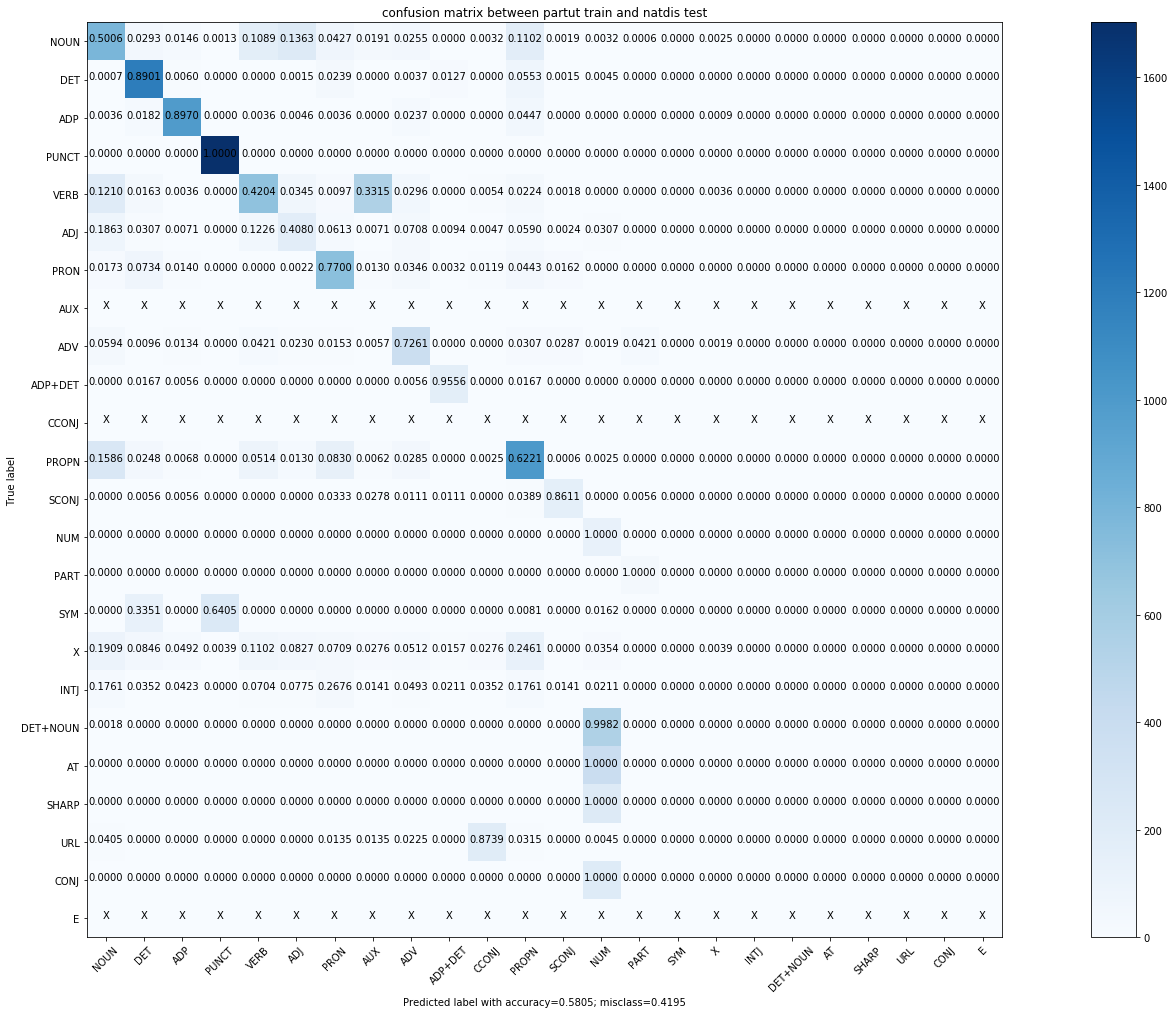

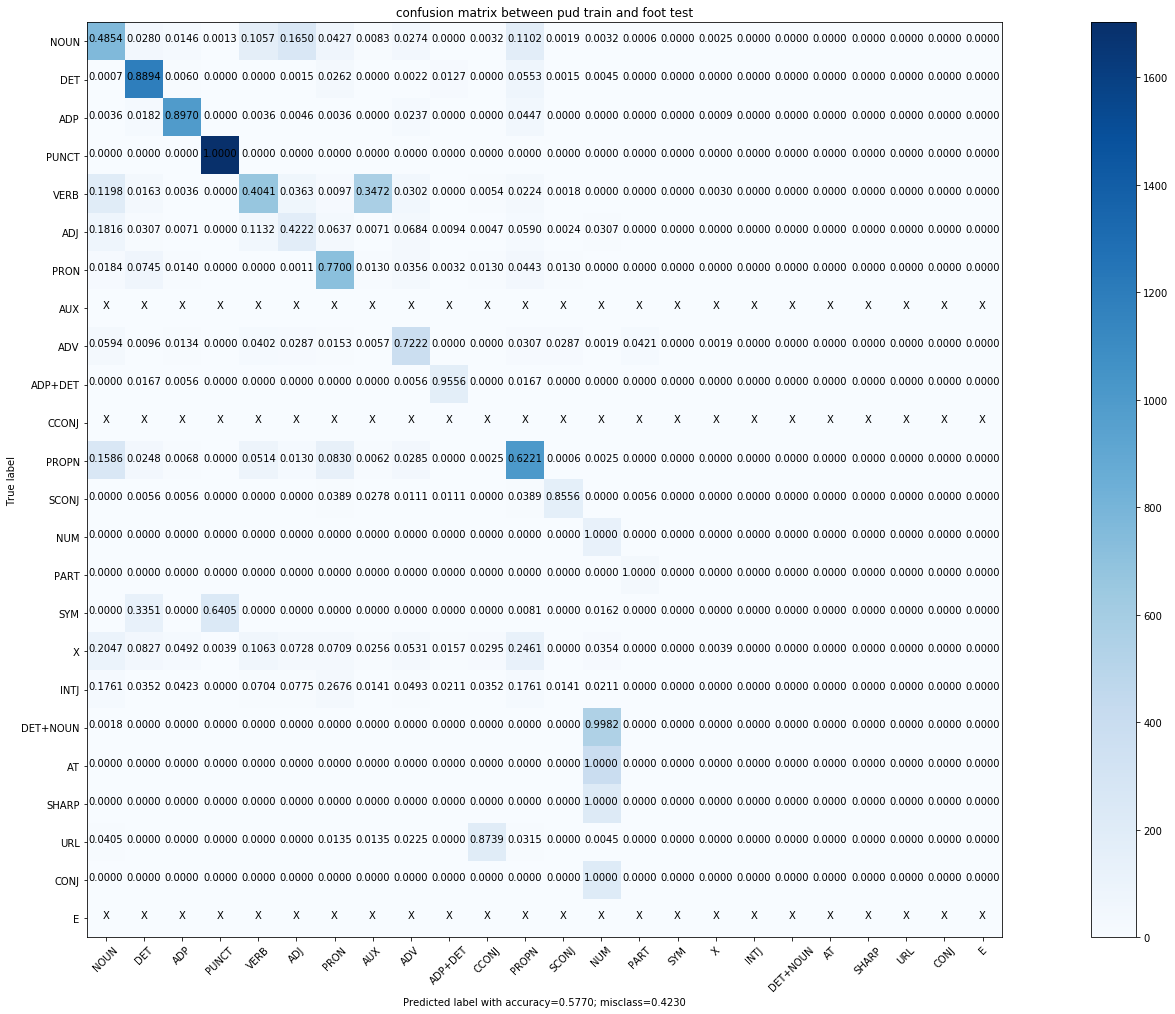

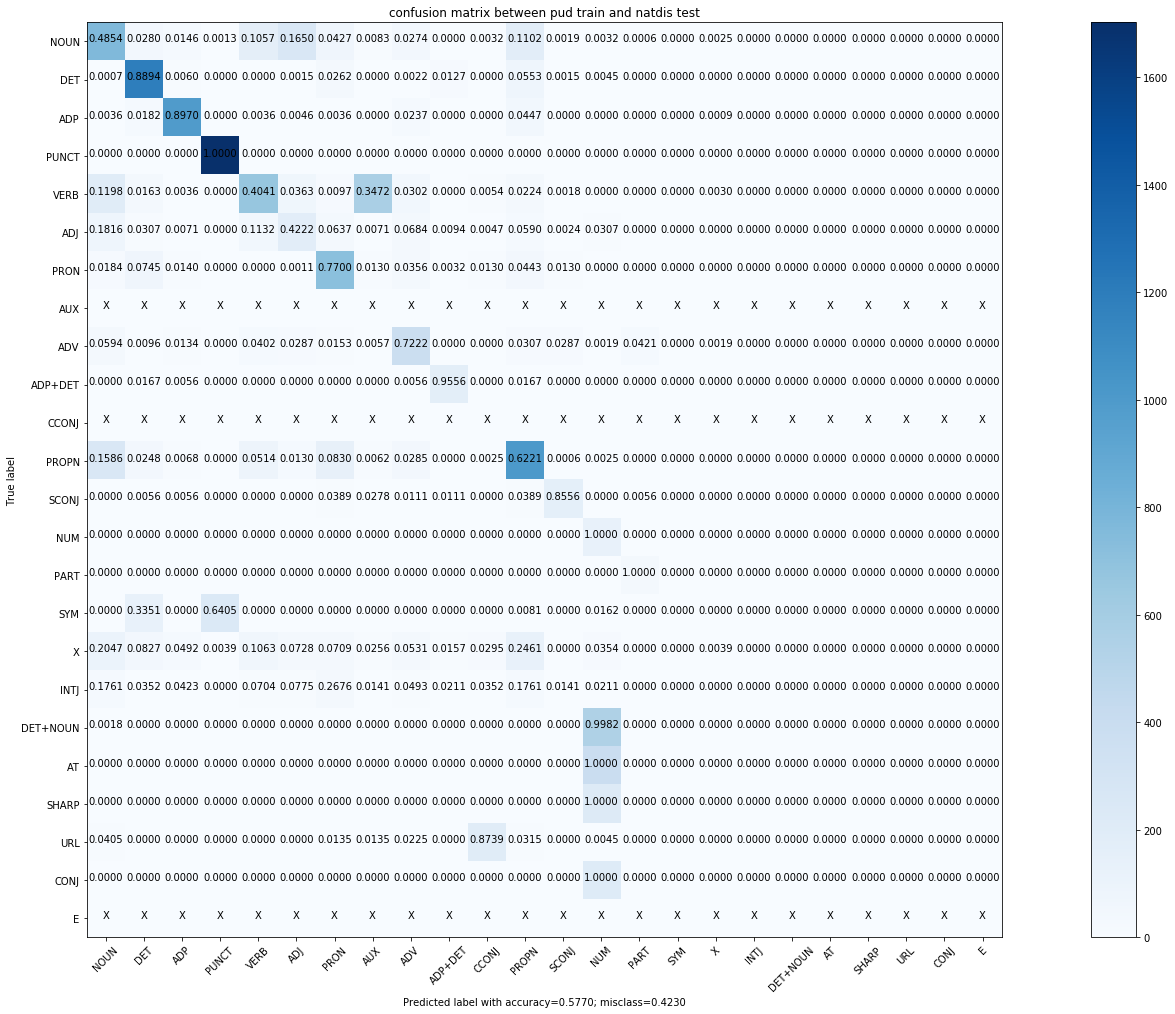

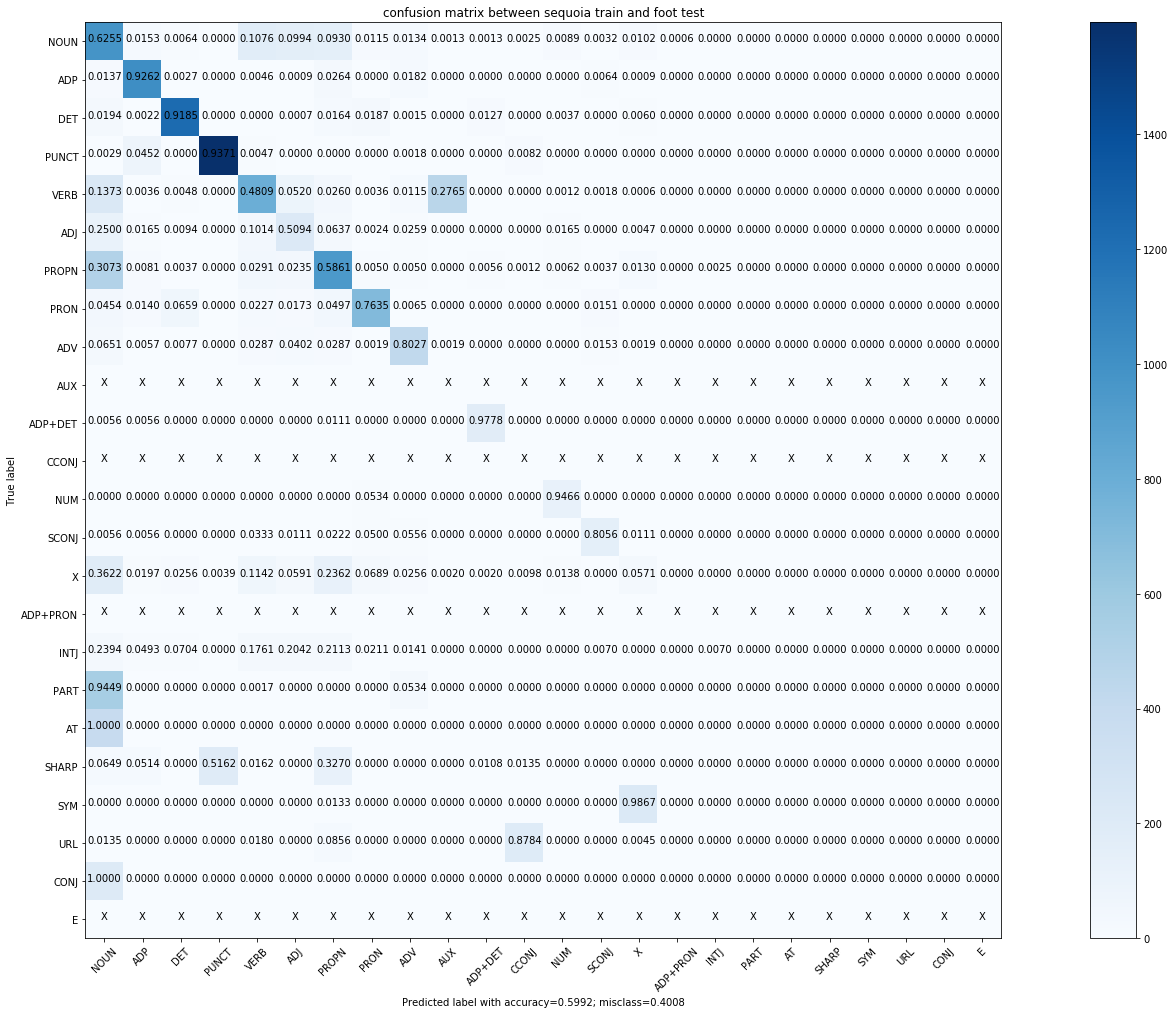

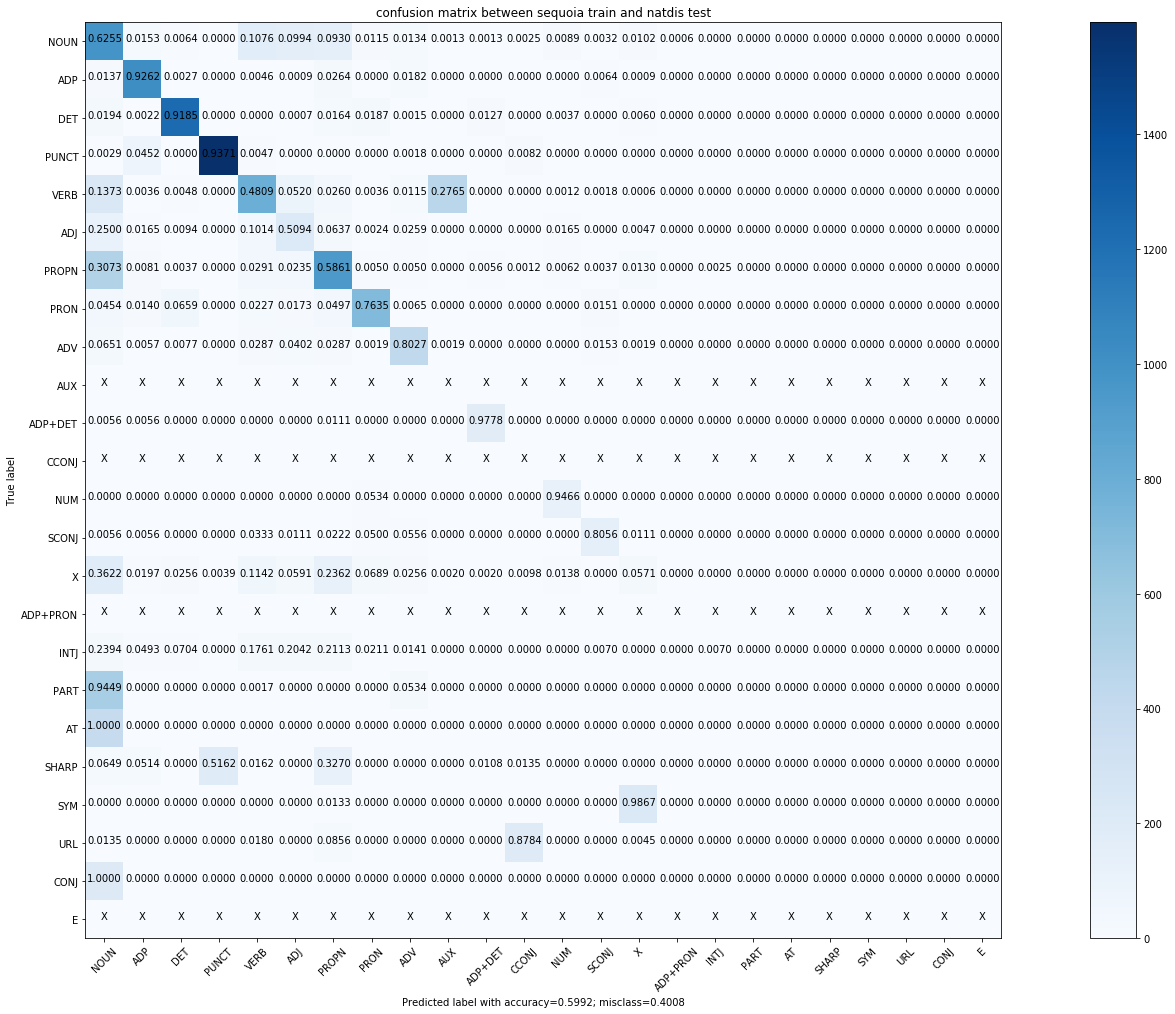

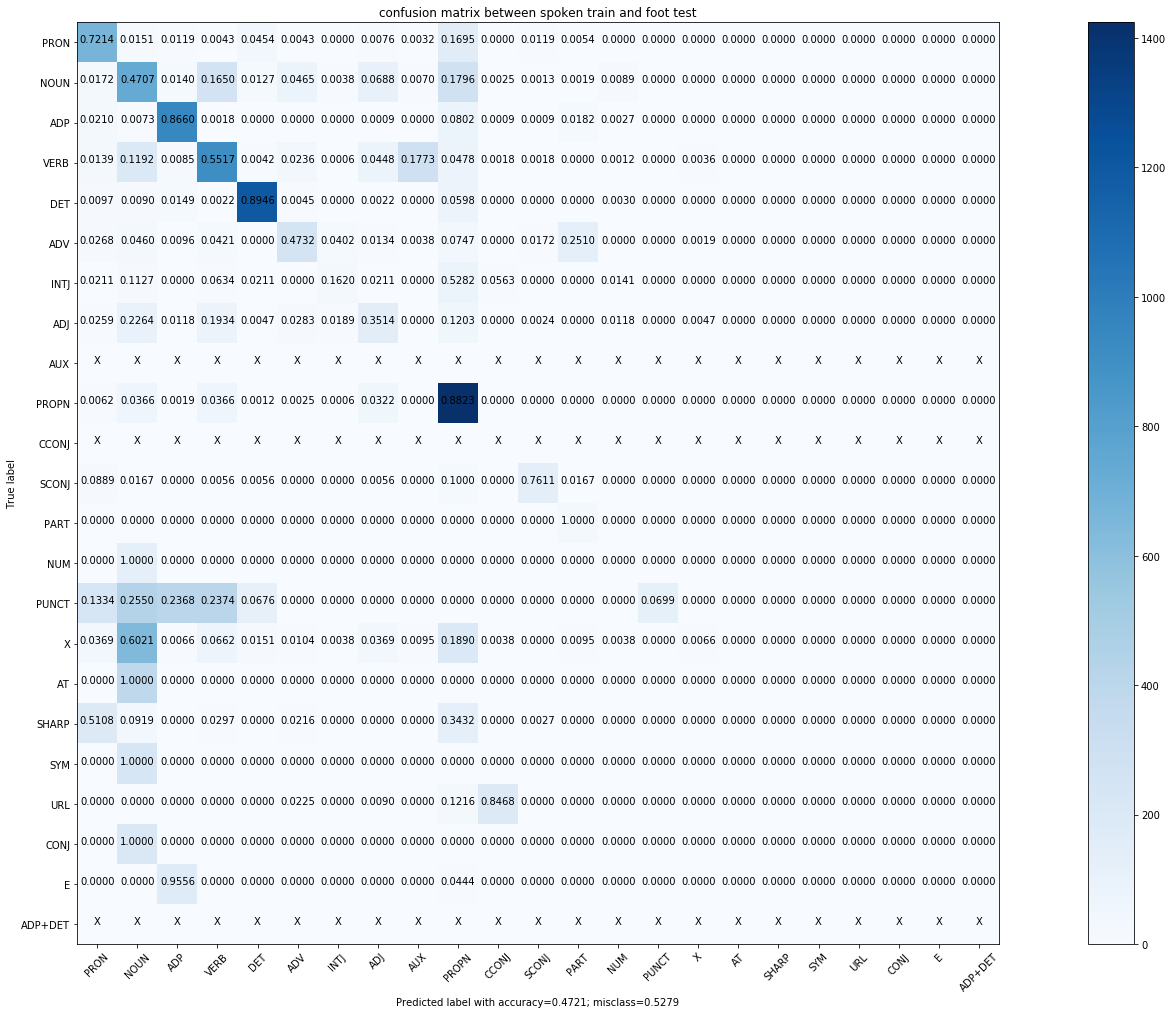

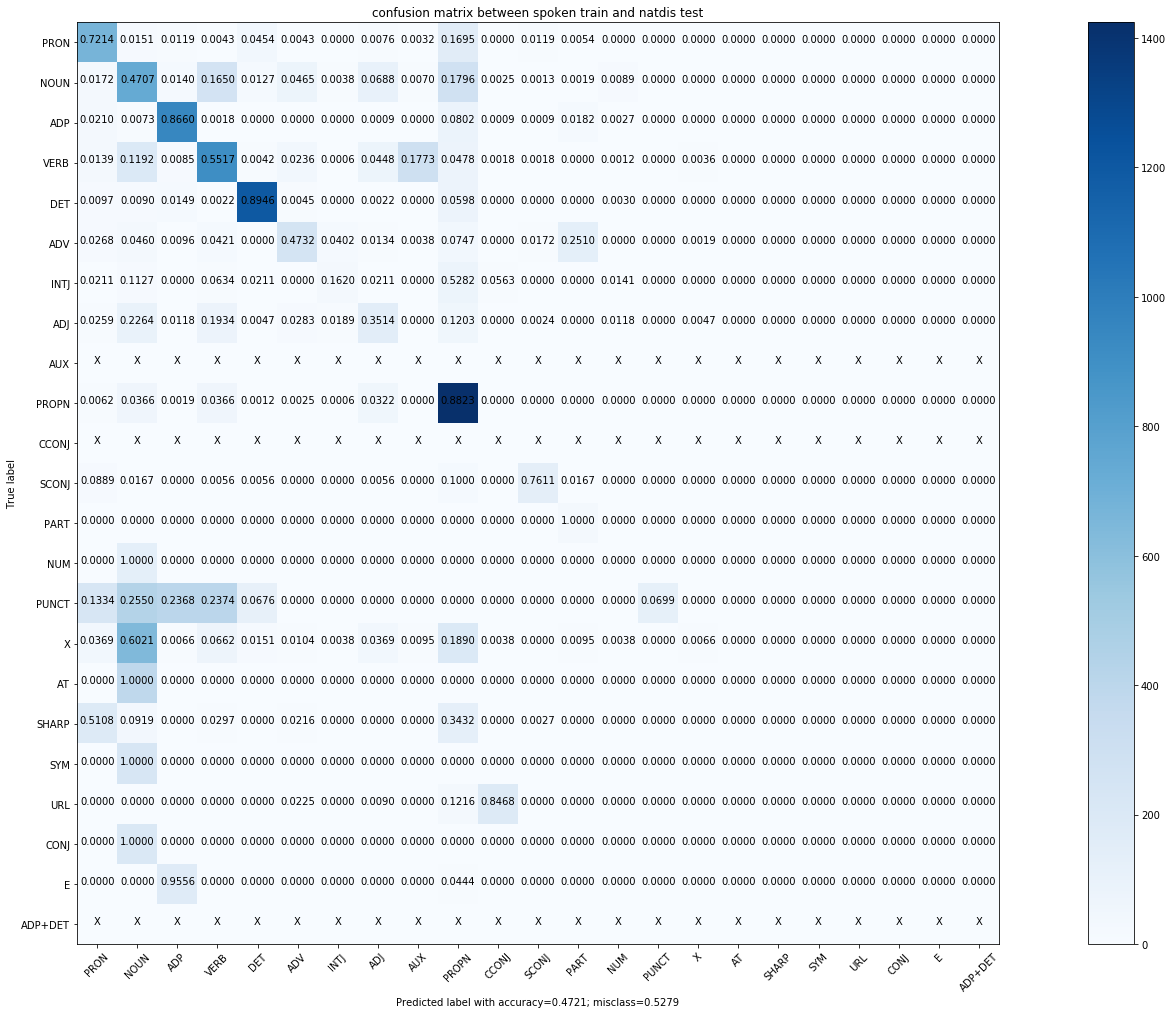

In [8]:
corpus = ["partut", "pud", "sequoia", "spoken"]
bestParam = [(15, "entropy", "mean"), (16, "entropy", "mean"), (17, "entropy", "median"), (15, "entropy", "mean")]

for nameDataset, (max_depth, split_criterion, gen_test) in zip(corpus, bestParam):
    train = da.listeCorpus[nameDataset].trainDataSet
    Xtrain, Ytrain = ft.buildFeature(train)

    
    decisionTree = dtree.DecisionTreeClassifier(Xtrain, Ytrain, 
                                                max_depth=max_depth, 
                                                split_criterion=split_criterion, 
                                                gen_test=gen_test)
    tree = decisionTree.fit()
    
    scoreFoot, cm_foot = decisionTree.modelScore(tree, Xfoot, Yfoot)
    scoreNatdis, cm_natdis = decisionTree.modelScore(tree, Xnatdis, Ynatdis)
    
    cm_foot_fig = ma.showConfusionMatrix(
            cm_foot, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and foot test")
    
    cm_natdis_fig = ma.showConfusionMatrix(
            cm_foot, decisionTree.classLabel.keys(), title="confusion matrix between " + nameDataset + " train and natdis test")
    
    cm_foot_fig.savefig("../results/decisionTree/confusion_matrix_foot_" + nameDataset)
    cm_natdis_fig.savefig("../results/decisionTree/confusion_matrix_natdis_" + nameDataset)

## Naive Bayes Classifier

In [ ]:
import NaiveBayesClassifier as naivebc

naiveBC = naivebc.NaiveBayesClassifier(Xtrain, Ytrain)

In [ ]:
naiveBC.fit()

In [ ]:
score, cm = naiveBC.modelScore(Xtest, Ytest)

In [ ]:
print(score)

In [ ]:
ma.showConfusionMatrix(cm, decisionTree.classLabel.keys())

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
Xtrain, Ytrain = ft.buildFeature(trainSet, lambda x:x)
Xtest, Ytest = ft.buildFeature(testSet, lambda x:x)


clf = MultinomialNB()
clf.fit(trainSet, testSet)

In [ ]:
clf.score(Xtest, Ytest)